In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
data=pd.read_excel('dataset.xlsx')  
data

,length,width,input_impedance,theoretical_resonant_frequency,practical_resonant_frequency,return loss
0,21,31,190.710,3.322,3.2,-14.732727
1,21,32,179.510,3.319,3.1,-18.323022
2,21,33,169.119,3.315,3.1,-9.921672
3,21,34,159.610,3.312,3.2,-10.766945
4,21,35,150.890,3.309,3.1,-18.116357
...,...,...,...,...,...,...
95,30,36,280.210,2.361,2.3,-7.401607
96,30,37,265.704,2.359,2.3,-7.689543
97,30,38,252.298,2.357,2.3,-8.025010
98,30,39,239.886,2.355,2.3,-8.521193


In [9]:
X = data[['length', 'width']].values  # attributes
Y = data['practical_resonant_frequency'].values   # labels

In [23]:
# Split attributes and labels into training and testing/validation data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

array([2.8, 2.6, 3.2, 2.5, 2.7, 2.7, 3.1, 2.3, 2.4, 2.5, 2.6, 2.4, 2.3,
       2.6, 2.7, 2.9, 3. , 2.6, 2.6, 2.5, 3.1, 2.6, 2.8, 2.8, 3.1, 3. ,
       3. , 2.8, 2.8, 3.1, 2.3, 2.6, 3.2, 2.8, 2.9, 2.7, 3. , 2.8, 2.9,
       2.7, 3.1, 2.9, 2.6, 2.7, 2.5, 2.4, 2.8, 2.4, 3. , 2.4, 3. , 2.9,
       2.7, 2.3, 2.3, 2.6, 3. , 2.3, 2.5, 2.5, 2.9, 2.8, 2.4, 2.7, 2.8,
       2.6, 2.6, 3.1, 2.4, 2.5, 2.4, 2.8, 2.9, 2.4, 3.1, 2.3, 2.6, 2.6,
       2.7, 2.8])

In [26]:
# Multiple Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Estimated coefficients of regression model
coeff_df = pd.DataFrame(regressor.coef_)  
coeff_df

,0
0,-0.088379
1,-0.006238


In [28]:
# Predict values using our test data and learned regression
y_pred = regressor.predict(X_test)

In [35]:
# Sanity check: adjusted_r2 should be close to, and lesser than, r2 
#[adjusted_r2 factors in the nb of predictors- refer this:
# https://blog.minitab.com/blog/adventures-in-statistics-2/multiple-regession-analysis-use-adjusted-r-squared-and-predicted-r-squared-to-include-the-correct-number-of-variables]
SS_Residual = sum((y_test-y_pred)**2) 
SS_Total = sum((y_test-np.mean(y_test))**2) 
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted r_squared: ",adjusted_r_squared, " & r_squared: ",r_squared)

Adjusted r_squared:  0.9792053161130769  & r_squared:  0.9813942302064372


In [32]:
# View the actual and predicted values for the labels
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,2.9,2.921253
1,2.4,2.390980
2,3.1,3.122964
3,2.7,2.662355
4,2.5,2.485597
5,2.3,2.321316
6,3.0,3.009632
7,2.5,2.498074
8,2.7,2.668593
9,2.3,2.308840


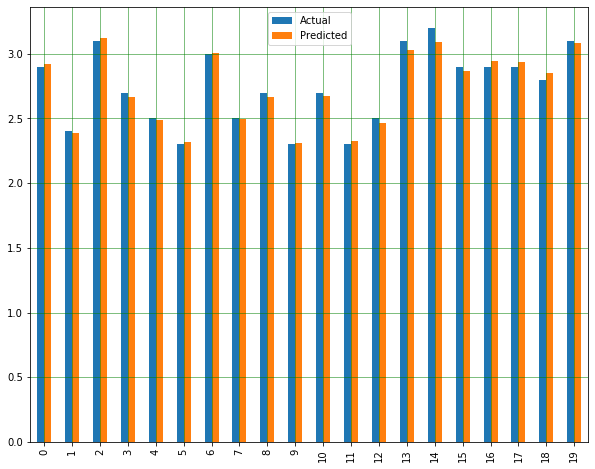

In [33]:
# Bar graph showing the same thing as above:
# NOTE: Seems to have greater difference between actual and pred values in higher values(eg 3.2,3.1). Could be coincidental, but a check would be nice
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [34]:
# Print all metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Log Error:', np.sqrt(metrics.mean_squared_log_error(y_test, y_pred )))
print('R^2 score:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.030990610968220044
Mean Squared Error: 0.0015331154309895746
Root Mean Squared Error: 0.03915501795414701
Root Mean Squared Log Error: 0.009952055757557449
R^2 score: 0.9813942302064372
